In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Banglore_House_Price.csv')
df.head(n=10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df.shape 
 

(13320, 9)

In [ ]:
df.isnull().mean()*100 #isnull() is used to find the missing values and mean is used to fullfill the values

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [ ]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df.drop(columns=["availability","area_type","society","balcony","bath"],axis=1,inplace=True)

In [ ]:
df.head()

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00


In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
price          0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
price         0
dtype: int64

In [ ]:
df.shape

(13303, 4)

In [ ]:
df.head()

,location,size,total_sqft,price
0,Electronic City Phase II,2 BHK,1056,39.07
1,Chikka Tirupathi,4 Bedroom,2600,120.00
2,Uttarahalli,3 BHK,1440,62.00
3,Lingadheeranahalli,3 BHK,1521,95.00
4,Kothanur,2 BHK,1200,51.00


In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df.head()

,location,size,total_sqft,price,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Uttarahalli,3 BHK,1440,62.00,3
3,Lingadheeranahalli,3 BHK,1521,95.00,3
4,Kothanur,2 BHK,1200,51.00,2


In [ ]:
df.drop(columns=["size"],axis=1,inplace=True)

In [ ]:
df.head()

,location,total_sqft,price,bhk
0,Electronic City Phase II,1056,39.07,2
1,Chikka Tirupathi,2600,120.00,4
2,Uttarahalli,1440,62.00,3
3,Lingadheeranahalli,1521,95.00,3
4,Kothanur,1200,51.00,2


In [ ]:
df.shape

(13303, 4)

In [ ]:
#df[df.bhk>22]

In [ ]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [ ]:
df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_into_number)

In [ ]:
df1.loc[30]

location      Yelahanka
total_sqft       2475.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
df2 = df1.copy()

In [ ]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,total_sqft,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,95.00,3,6245.890861
4,Kothanur,1200.0,51.00,2,4250.000000


In [ ]:
df2['location'].value_counts()

Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [ ]:
df2['location'] = df2['location'].apply(lambda x: x.strip())
df2.location.value_counts()

Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(df2.location.unique())

1293

In [ ]:
df2[ (df2.total_sqft / df2.bhk < 300) ].head()

,location,total_sqft,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,370.0,6,36274.509804
45,HSR Layout,600.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,85.0,8,6296.296296
70,Double Road,500.0,100.0,3,20000.000000


In [ ]:
df3 = df2[ ~(df2.total_sqft / df2.bhk < 300) ]
df3.shape

(12559, 5)

In [ ]:
df3.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'):
        m = np.mean( sub.price_per_sqft )
        st = np.std( sub.price_per_sqft )
        reduce_df = sub[( sub.price_per_sqft>(m-st) ) & ( sub.price_per_sqft<=(m+st) ) ]
        df_out = pd.concat( [df_out, reduce_df],ignore_index=True )
    return df_out

In [ ]:
df4 = remove_outlier_from_price_per_sqft(df3)
df4.shape

(9311, 5)

In [ ]:
df4.describe()

,total_sqft,price,bhk,price_per_sqft
count,9311.000000,9311.000000,9311.000000,9311.000000
mean,1508.678663,94.421944,2.559661,5726.506402
std,898.119876,110.684258,0.849629,2533.237093
min,300.000000,10.000000,1.000000,1250.000000
25%,1110.000000,49.000000,2.000000,4261.582324
50%,1286.000000,67.000000,2.000000,5188.679245
75%,1650.000000,100.000000,3.000000,6405.837886
max,30400.000000,2912.000000,10.000000,35000.000000


In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

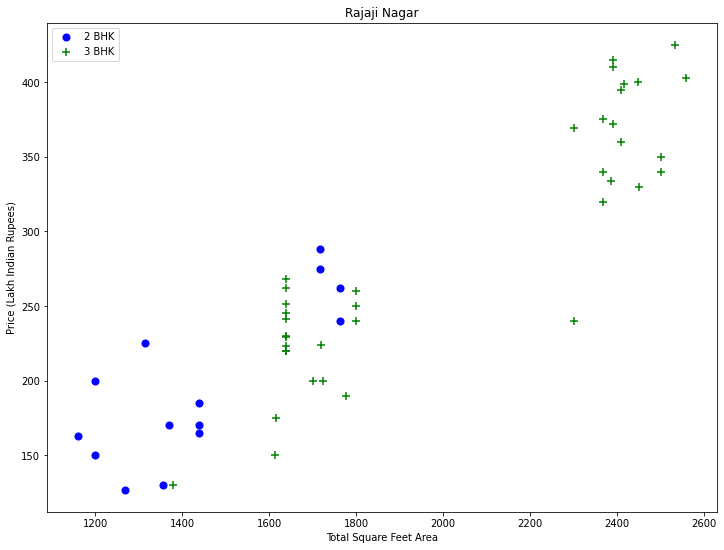

In [ ]:
plot_scatter_chart(df4,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7528, 5)

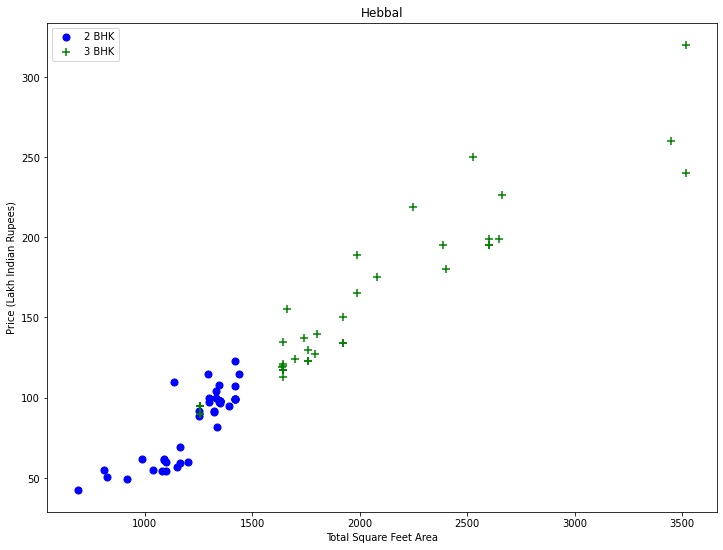

In [ ]:
plot_scatter_chart(df5,"Hebbal")

In [ ]:
df6.shape

(7499, 6)

In [ ]:
df7 = df6.drop(['price_per_sqft',"bath"],axis='columns')
df7.head()

,location,total_sqft,price,bhk
0,1st Block BEL Layout,1540.0,85.0,3
1,1st Block HBR Layout,600.0,45.0,1
2,1st Block HBR Layout,3150.0,150.0,4
3,1st Block HRBR Layout,2300.0,80.0,3
4,1st Block HRBR Layout,1250.0,67.0,2


In [ ]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df8 = pd.concat([df7,dummies.drop('tc.palya',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south
0,1st Block BEL Layout,1540.0,85.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,45.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,150.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,2300.0,80.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block HRBR Layout,1250.0,67.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df8.drop('location',axis='columns',inplace=True)
df8.head()

,total_sqft,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south
0,1540.0,85.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,45.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,150.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2300.0,80.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,67.0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df8.shape

(7499, 763)

In [ ]:
x = df8.drop('price',axis=1)
y = df8['price']

In [ ]:
x.shape

(7499, 762)

In [ ]:
y.shape

(7499,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5999, 762), (1500, 762), (5999,), (1500,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-1.0638862410106164e+16

In [ ]:
pred = lr.predict(X_test)
pred

array([313.63210432,  55.66005843,  37.40412913, ...,  58.10432345,
        77.35129845,  41.55220947])

In [ ]:
pred = lr.predict(X_test)
pred

array([313.63210432,  55.66005843,  37.40412913, ...,  58.10432345,
        77.35129845,  41.55220947])

In [ ]:
location=str(input("location:"))
sqft=float(input("sqft:"))
bhk=float(input("bhk:"))


def predict_price(location,sqft,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bhk
    if loc_index >= 0:
        X[loc_index] = 0

    return lr.predict([X])[0]

location:Chikka Tirupathi
sqft:2600
bhk:4


In [ ]:
predict_price(location,sqft,bhk)
 #predict_price('1st Phase JP Nagar',1000, 2, 2)
 #

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


187.8115668730607